# Nesse notebook

# Referências
- https://docs.langchain.com/oss/python/langgraph/overview
- https://docs.langchain.com/oss/python/langgraph/quickstart
- https://docs.langchain.com/oss/python/langchain/messages
- https://medium.com/@lorevanoudenhove/how-to-build-ai-agents-with-langgraph-a-step-by-step-guide-5d84d9c7e832
- https://docs.langchain.com/oss/python/langgraph/graph-api

# Importando Bibliotecas

In [ ]:
# from langchain import hub
# from langchain.agents import create_openai_functions_agent
import base64
from io import BytesIO

import matplotlib.pyplot as plt
from dotenv import load_dotenv
from IPython.display import Markdown
from langchain_ollama.chat_models import ChatOllama
from langchain_openai.chat_models import ChatOpenAI
from rich import print as pprint

load_dotenv()

True

Primeiro precisamos ter acesso ao modelo de linguagem que iremos utilizar. Aqui, temos duas opções: o modelo local Llama 3.1 através do Ollama, ou o modelo GPT-5 Nano da OpenAI.

In [ ]:
# model = ChatOllama(model="llama3.1:8b")
model = ChatOpenAI(model="gpt-5-nano")


Você pode facilmente usar o modelo para inferência usando o método invoque (retorna a resposta de uma vez) ou o método stream (retorna um gerador para streaming de respostas).

In [ ]:
response = model.invoke("Why is the sky blue?")
pprint(response)

AIMessage(
    content='Because sunlight is made of many colors, and the Earth’s atmosphere scatters some colors more than 
others.\n\n- Sunlight (white light) contains all colors.\n- The air molecules scatter short-wavelength light (blue 
and violet) more than long-wavelength light (red).\n- Violet is scattered even more than blue, but we don’t see a 
violet sky because:\n  - there’s less violet light in the Sun’s spectrum,\n  - the upper atmosphere absorbs much of
the violet, and\n  - our eyes are more sensitive to blue.\n- The scattered blue light comes from every direction, 
so when you look up you mostly see blue.\n\nWhy sunsets look red/orange:\n- Light travels through a longer path in 
the atmosphere, so even more blue light is scattered away, leaving red/orange colors.\n\nOther notes:\n- On the 
Moon (no atmosphere) the sky looks black.\n- Weather, pollution, and dust can make the sky look paler or grayer.',
    additional_kwargs={'refusal': None},
    response_metadata={
        'token_usage': {
            'completion_tokens': 1167,
            'prompt_tokens': 12,
            'total_tokens': 1179,
            'completion_tokens_details': {
                'accepted_prediction_tokens': 0,
                'audio_tokens': 0,
                'reasoning_tokens': 960,
                'rejected_prediction_tokens': 0
            },
            'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}
        },
        'model_provider': 'openai',
        'model_name': 'gpt-5-nano-2025-08-07',
        'system_fingerprint': None,
        'id': 'chatcmpl-CYM01pWfGNKpmESoLe2jrTGVWyChw',
        'service_tier': 'default',
        'finish_reason': 'stop',
        'logprobs': None
    },
    id='lc_run--c87b938a-abc5-444d-8b09-62b828610c4d-0',
    usage_metadata={
        'input_tokens': 12,
        'output_tokens': 1167,
        'total_tokens': 1179,
        'input_token_details': {'audio': 0, 'cache_read': 0},
        'output_token_details': {'audio': 0, 'reasoning': 960}
    }
)

In [ ]:
generator = model.stream("Why is the sky blue?")
for token in generator:
    print(token.content, end="")

Sunlight looks white, but it’s really a mix of all colors. When it hits Earth’s atmosphere, it collides with molecules and particles and gets scattered in different directions.

- Shorter wavelengths (blue and violet) scatter more than longer wavelengths (red). 
- We predominantly see blue because blue light is scattered in all directions and is what reaches our eyes from every part of the sky.
- Why not violet? Violet light is scattered even more, but the sky isn’t violet because:
  - The Sun emits relatively less violet than blue.
  - The upper atmosphere absorbs a lot of violet.
  - Our eyes are more sensitive to blue.

Additional notes:
- At sunrise and sunset, the Sun’s light travels through a longer path in the atmosphere, scattering away more of the blue/green light and leaving reds and oranges, so the sky near the Sun looks redder.
- Clouds or smoke can make the sky look whitish or gray due to different scattering (Mie scattering) and larger particles.

Podemos passar uma string diretamente (como visto acima), mas a forma recomendada é usar objetos de mensagem, como HumanMessage (a pergunta do usuário), AIMessage (a resposta do modelo), SystemMessage (que pode ser o system prompt, que são as instruções para o LLM).  
  
Passar uma lista de mensagens é ideal também para conversas, onde o contexto é importante e as mensagens anteriores devem ser levadas em consideração, e é importante especificar se é um prompt do sistema, se é mensagem do usuário ou se é mensagem do modelo.  

In [ ]:
from langchain.messages import HumanMessage, AIMessage, SystemMessage

messages = [HumanMessage(content="Why is the sky blue?")]

response = model.invoke(messages)
pprint(response)

AIMessage(
    content="Because sunlight (white light) contains all colors, and the Earth's atmosphere acts like a playground 
for light.\n\n- When sunlight hits air molecules, it collides and scatters in all directions.\n- Shorter 
wavelengths scatter much more than longer ones. Blue and violet light have shorter wavelengths than red or 
yellow.\n- We see the sky as blue because blue light is scattered toward our eyes from every direction. Violet is 
scattered even more, but...\n  - The Sun emits comparatively little violet light.\n  - The atmosphere absorbs a lot
of violet.\n  - Our eyes are more sensitive to blue than to violet.\n  - So the net color we perceive is 
blue.\n\nWhy the sky isn’t violet and why it changes color at sunrise/sunset:\n\n- At sunrise and sunset, the Sun’s
light passes through a thicker slice of the atmosphere. Most blue light is scattered out away from us, leaving reds
and oranges to dominate the sky.\n- Dust, pollution, and clouds can also affect the color, making skies appear more
red or gray.",
    additional_kwargs={'refusal': None},
    response_metadata={
        'token_usage': {
            'completion_tokens': 1048,
            'prompt_tokens': 12,
            'total_tokens': 1060,
            'completion_tokens_details': {
                'accepted_prediction_tokens': 0,
                'audio_tokens': 0,
                'reasoning_tokens': 832,
                'rejected_prediction_tokens': 0
            },
            'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}
        },
        'model_provider': 'openai',
        'model_name': 'gpt-5-nano-2025-08-07',
        'system_fingerprint': None,
        'id': 'chatcmpl-CYMWt69LLcKqfajJcXwZF5FqXmRNQ',
        'service_tier': 'default',
        'finish_reason': 'stop',
        'logprobs': None
    },
    id='lc_run--8e575eeb-28a0-43d0-82d6-14621cc0ad7f-0',
    usage_metadata={
        'input_tokens': 12,
        'output_tokens': 1048,
        'total_tokens': 1060,
        'input_token_details': {'audio': 0, 'cache_read': 0},
        'output_token_details': {'audio': 0, 'reasoning': 832}
    }
)

É bem comum criar um prompt do sistema para definir o comportamento do modelo, e ele pode ser passado para o modelo de várias formas, dentre elas pode ser através de um SystemMessage, outras formas serão exploradas mais adiante.

In [ ]:
from langchain.messages import SystemMessage, HumanMessage, AIMessage

messages = [
    SystemMessage("You are a poetry expert"),
    HumanMessage("Write a haiku about spring"),
    AIMessage("Cherry blossoms bloom..."),
]
response = model.invoke(messages)
pprint(response)

AIMessage(
    content='Cherry blossoms bloom\nSoft winds carry new green leaves\nBright buds greet the sun',
    additional_kwargs={'refusal': None},
    response_metadata={
        'token_usage': {
            'completion_tokens': 1369,
            'prompt_tokens': 31,
            'total_tokens': 1400,
            'completion_tokens_details': {
                'accepted_prediction_tokens': 0,
                'audio_tokens': 0,
                'reasoning_tokens': 1344,
                'rejected_prediction_tokens': 0
            },
            'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}
        },
        'model_provider': 'openai',
        'model_name': 'gpt-5-nano-2025-08-07',
        'system_fingerprint': None,
        'id': 'chatcmpl-CYMaASHTlFWqpguPTngjm5mJDi56e',
        'service_tier': 'default',
        'finish_reason': 'stop',
        'logprobs': None
    },
    id='lc_run--1c9c56c9-9125-4a38-b78c-cdbd2dda5478-0',
    usage_metadata={
        'input_tokens': 31,
        'output_tokens': 1369,
        'total_tokens': 1400,
        'input_token_details': {'audio': 0, 'cache_read': 0},
        'output_token_details': {'audio': 0, 'reasoning': 1344}
    }
)

Acontece que o modelo é muito básico e apenas é capaz de receber e retornar texto. No entanto, podemos fazer com que ele tenha capacidades adicionais, como acessar dados privados (podemos fazer um RAG para isso), mas também outras capacidades como a geração de gráficos.  
  
Para isso, podemos usar o LangGraph, que é uma extensão do LangChain que permite adicionar essas capacidades extras aos modelos de linguagem.  
  
No exemplo abaixo, vamos ver como podemos criar um grafo com o LangGraph para permitir que o modelo gere gráficos de linhas a partir de dados fornecidos.

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END


def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "hello world"}]}


graph = StateGraph(MessagesState)
graph.add_node(mock_llm)
graph.add_edge(START, "mock_llm")
graph.add_edge("mock_llm", END)
graph = graph.compile()

graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})

In [20]:
from langchain.tools import tool


@tool
def create_line_plot(x, y) -> str:
    """
    Retorna um gráfico codificado como base64 no formato markdown
    """
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("My Plot")
    buffer = BytesIO()
    fig.savefig(buffer, format="png")
    plt.close(fig)

    encoded_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
    markdown_encoded_image = f"![image](data:image/png;base64,{encoded_image})"

    return markdown_encoded_image


tools = [create_line_plot]

model.bind_tools(tools=tools)

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x75eba45d9d10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x75eba45da0d0>, root_client=<openai.OpenAI object at 0x75eba45d9a90>, root_async_client=<openai.AsyncOpenAI object at 0x75eba45d9e50>, model_name='gpt-5-nano', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True), kwargs={'tools': [{'type': 'function', 'function': {'name': 'create_line_plot', 'description': 'Retorna um gráfico codificado como base64 no formato markdown', 'parameters': {'properties': {'x': {}, 'y': {}}, 'required': ['x', 'y'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [22]:
input = """
Preciso que você crie um gráfico de barras com os dados:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
"""
response = model.invoke(input)

In [24]:
pprint(response.content)

Aqui está um código simples em Python usando matplotlib para criar o gráfico de barras com os dados fornecidos:

```python
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.figure(figsize=(6, 4))
plt.bar(x, y, color='steelblue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de Barras: y = x^2')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
```

Observações:
- Este código gera um gráfico de barras com x no eixo horizontal e y no vertical.
- Para executar: tenha Python e matplotlib instalados (pip install matplotlib).

Se quiser em outra linguagem ou ferramenta (R, Plotly JavaScript, etc.), me diga que eu adapto.

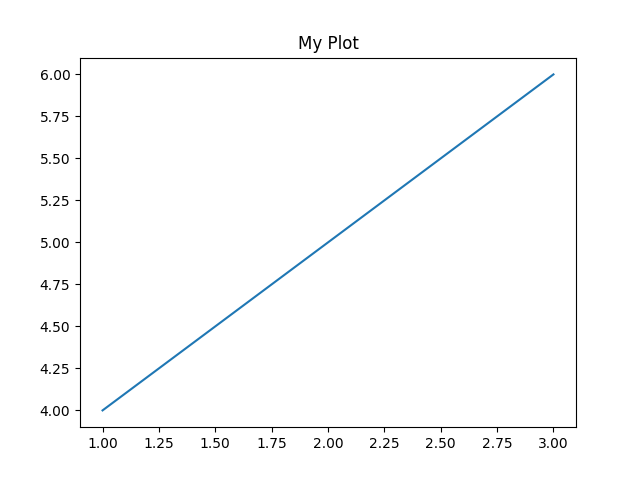

In [14]:
Markdown(f"![image](data:image/png;base64,{encoded_image})")

In [1]:
0.005 * 4000

20.0